In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import certifi
import json
import os

In [2]:
path=r'C:\Users\ZHuiL\Documents\FYP QFIN'
os.chdir(path)
data = pd.read_csv('FYP QFINdata.csv',encoding='utf-8')
data

,Unnamed: 0,Ticker,Transcript,Date
0,2,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2017-11-12 17:00:00
1,3,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-03-02 17:00:00
2,4,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-05-09 17:00:00
3,5,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-08-08 17:00:00
4,8,PVAC,"Operator: Good day, and welcome to the Penn Vi...",2019-05-10 17:00:00
...,...,...,...,...
3158,4186,CAR,"Operator: Greetings, and welcome to the Avis B...",2019-11-01 17:00:00
3159,4187,CAR,Operator: Greetings and welcome to the Avis Bu...,2020-02-20 17:00:00
3160,4188,CAR,"Operator: Greetings, and welcome to the Avis B...",2020-05-05 17:00:00
3161,4189,CAR,Operator: Hello and welcome to the Avis Budget...,2020-07-29 17:00:00


In [3]:
WordsOfInterest = ["cost-cut","deleverage","deleveraging","deleveraged","debt-reduction","synergy","synergies","acquisition","acquisitions","acquire","acquiring","merger","mergers","paydown","pay-down","buyback","buy-back","repurchase","repurchased","repurchasing","tender-offer","dividends","dividend"] 


In [4]:
PhrasesOfInterest = ["improved margins","improve margins", "margin improvement", "margin expansion", "eliminate costs", "cost cutting", "cut cost", "reduced costs", "reducing costs", "pay down","debt reduction","reducing debt","reduced debt","reduce debt","buy back","bought back","tender offer", "revenue growth","debt restructuring","decrease leverage","decreasing leverage","pay off"] 

In [38]:
scores1=[]
freq1=[]
total=[]
for sent in data['Transcript']:
    temp=0
    for word in WordsOfInterest:
        value = sent.count(word)
        #print(value)
        #print(sent, "\n")
        temp+=value
    res = len(sent.split())
    temp2=temp/res
    scores1.append(temp)
    freq1.append(temp2)
    total.append(len(sent.split()))


In [29]:
scores1
data["scores1"]=scores1
data

,Unnamed: 0,Ticker,Transcript,Date,scores1
0,2,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2017-11-12 17:00:00,7
1,3,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-03-02 17:00:00,22
2,4,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-05-09 17:00:00,10
3,5,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-08-08 17:00:00,8
4,8,PVAC,"Operator: Good day, and welcome to the Penn Vi...",2019-05-10 17:00:00,6
...,...,...,...,...,...
3158,4186,CAR,"Operator: Greetings, and welcome to the Avis B...",2019-11-01 17:00:00,11
3159,4187,CAR,Operator: Greetings and welcome to the Avis Bu...,2020-02-20 17:00:00,10
3160,4188,CAR,"Operator: Greetings, and welcome to the Avis B...",2020-05-05 17:00:00,2
3161,4189,CAR,Operator: Hello and welcome to the Avis Budget...,2020-07-29 17:00:00,2


In [32]:
freq1
data["freq1"]=freq1

In [26]:
scores2=[]
freq2=[]
for sent in data['Transcript']:
    temp=0
    for word in PhrasesOfInterest:
        value = sent.count(word)
        #print(value)
        #print(sent, "\n")
        temp+=value
    res = len(sent.split())
    temp2=temp/res
    scores2.append(temp)
    freq2.append(temp2)


In [33]:
scores2
data["scores2"]=scores2

In [39]:
data["freq2"]=freq2
data["total"]=total

In [40]:
data

,Unnamed: 0,Ticker,Transcript,Date,scores1,freq1,freq2,scores2,total
0,2,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2017-11-12 17:00:00,7,0.001516,0.000000,0,4616
1,3,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-03-02 17:00:00,22,0.004362,0.000000,0,5044
2,4,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-05-09 17:00:00,10,0.002206,0.000000,0,4533
3,5,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-08-08 17:00:00,8,0.001026,0.000000,0,7800
4,8,PVAC,"Operator: Good day, and welcome to the Penn Vi...",2019-05-10 17:00:00,6,0.000956,0.000000,0,6276
...,...,...,...,...,...,...,...,...,...
3158,4186,CAR,"Operator: Greetings, and welcome to the Avis B...",2019-11-01 17:00:00,11,0.001192,0.000000,0,9231
3159,4187,CAR,Operator: Greetings and welcome to the Avis Bu...,2020-02-20 17:00:00,10,0.001164,0.000582,5,8590
3160,4188,CAR,"Operator: Greetings, and welcome to the Avis B...",2020-05-05 17:00:00,2,0.000248,0.000124,1,8049
3161,4189,CAR,Operator: Hello and welcome to the Avis Budget...,2020-07-29 17:00:00,2,0.000231,0.000000,0,8642


In [41]:
data.to_csv(r'C:\Users\ZHuiL\Documents\FYP QFIN\score.csv')

In [42]:
data

,Unnamed: 0,Ticker,Transcript,Date,scores1,freq1,freq2,scores2,total
0,2,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2017-11-12 17:00:00,7,0.001516,0.000000,0,4616
1,3,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-03-02 17:00:00,22,0.004362,0.000000,0,5044
2,4,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-05-09 17:00:00,10,0.002206,0.000000,0,4533
3,5,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-08-08 17:00:00,8,0.001026,0.000000,0,7800
4,8,PVAC,"Operator: Good day, and welcome to the Penn Vi...",2019-05-10 17:00:00,6,0.000956,0.000000,0,6276
...,...,...,...,...,...,...,...,...,...
3158,4186,CAR,"Operator: Greetings, and welcome to the Avis B...",2019-11-01 17:00:00,11,0.001192,0.000000,0,9231
3159,4187,CAR,Operator: Greetings and welcome to the Avis Bu...,2020-02-20 17:00:00,10,0.001164,0.000582,5,8590
3160,4188,CAR,"Operator: Greetings, and welcome to the Avis B...",2020-05-05 17:00:00,2,0.000248,0.000124,1,8049
3161,4189,CAR,Operator: Hello and welcome to the Avis Budget...,2020-07-29 17:00:00,2,0.000231,0.000000,0,8642


In [87]:
new=data['Date']
data['Date2']=pd.to_datetime(data['Date'])
data.to_csv(r'C:\Users\ZHuiL\Documents\FYP QFIN\score.csv')
data

,Unnamed: 0,Ticker,Transcript,Date,scores1,freq1,freq2,scores2,total,Date2
0,2,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2017-11-12 17:00:00,7,0.001516,0.000000,0,4616,2017-11-12 17:00:00
1,3,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-03-02 17:00:00,22,0.004362,0.000000,0,5044,2018-03-02 17:00:00
2,4,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-05-09 17:00:00,10,0.002206,0.000000,0,4533,2018-05-09 17:00:00
3,5,PVAC,"Operator: Good day, ladies and gentlemen, and ...",2018-08-08 17:00:00,8,0.001026,0.000000,0,7800,2018-08-08 17:00:00
4,8,PVAC,"Operator: Good day, and welcome to the Penn Vi...",2019-05-10 17:00:00,6,0.000956,0.000000,0,6276,2019-05-10 17:00:00
...,...,...,...,...,...,...,...,...,...,...
3158,4186,CAR,"Operator: Greetings, and welcome to the Avis B...",2019-11-01 17:00:00,11,0.001192,0.000000,0,9231,2019-11-01 17:00:00
3159,4187,CAR,Operator: Greetings and welcome to the Avis Bu...,2020-02-20 17:00:00,10,0.001164,0.000582,5,8590,2020-02-20 17:00:00
3160,4188,CAR,"Operator: Greetings, and welcome to the Avis B...",2020-05-05 17:00:00,2,0.000248,0.000124,1,8049,2020-05-05 17:00:00
3161,4189,CAR,Operator: Hello and welcome to the Avis Budget...,2020-07-29 17:00:00,2,0.000231,0.000000,0,8642,2020-07-29 17:00:00


In [91]:
df3=data.drop(labels='Transcript',axis=1)
df3
df3.to_csv(r'C:\Users\ZHuiL\Documents\FYP QFIN\score2.csv')
df3

,Unnamed: 0,Ticker,Date,scores1,freq1,freq2,scores2,total,Date2
0,2,PVAC,2017-11-12 17:00:00,7,0.001516,0.000000,0,4616,2017-11-12 17:00:00
1,3,PVAC,2018-03-02 17:00:00,22,0.004362,0.000000,0,5044,2018-03-02 17:00:00
2,4,PVAC,2018-05-09 17:00:00,10,0.002206,0.000000,0,4533,2018-05-09 17:00:00
3,5,PVAC,2018-08-08 17:00:00,8,0.001026,0.000000,0,7800,2018-08-08 17:00:00
4,8,PVAC,2019-05-10 17:00:00,6,0.000956,0.000000,0,6276,2019-05-10 17:00:00
...,...,...,...,...,...,...,...,...,...
3158,4186,CAR,2019-11-01 17:00:00,11,0.001192,0.000000,0,9231,2019-11-01 17:00:00
3159,4187,CAR,2020-02-20 17:00:00,10,0.001164,0.000582,5,8590,2020-02-20 17:00:00
3160,4188,CAR,2020-05-05 17:00:00,2,0.000248,0.000124,1,8049,2020-05-05 17:00:00
3161,4189,CAR,2020-07-29 17:00:00,2,0.000231,0.000000,0,8642,2020-07-29 17:00:00


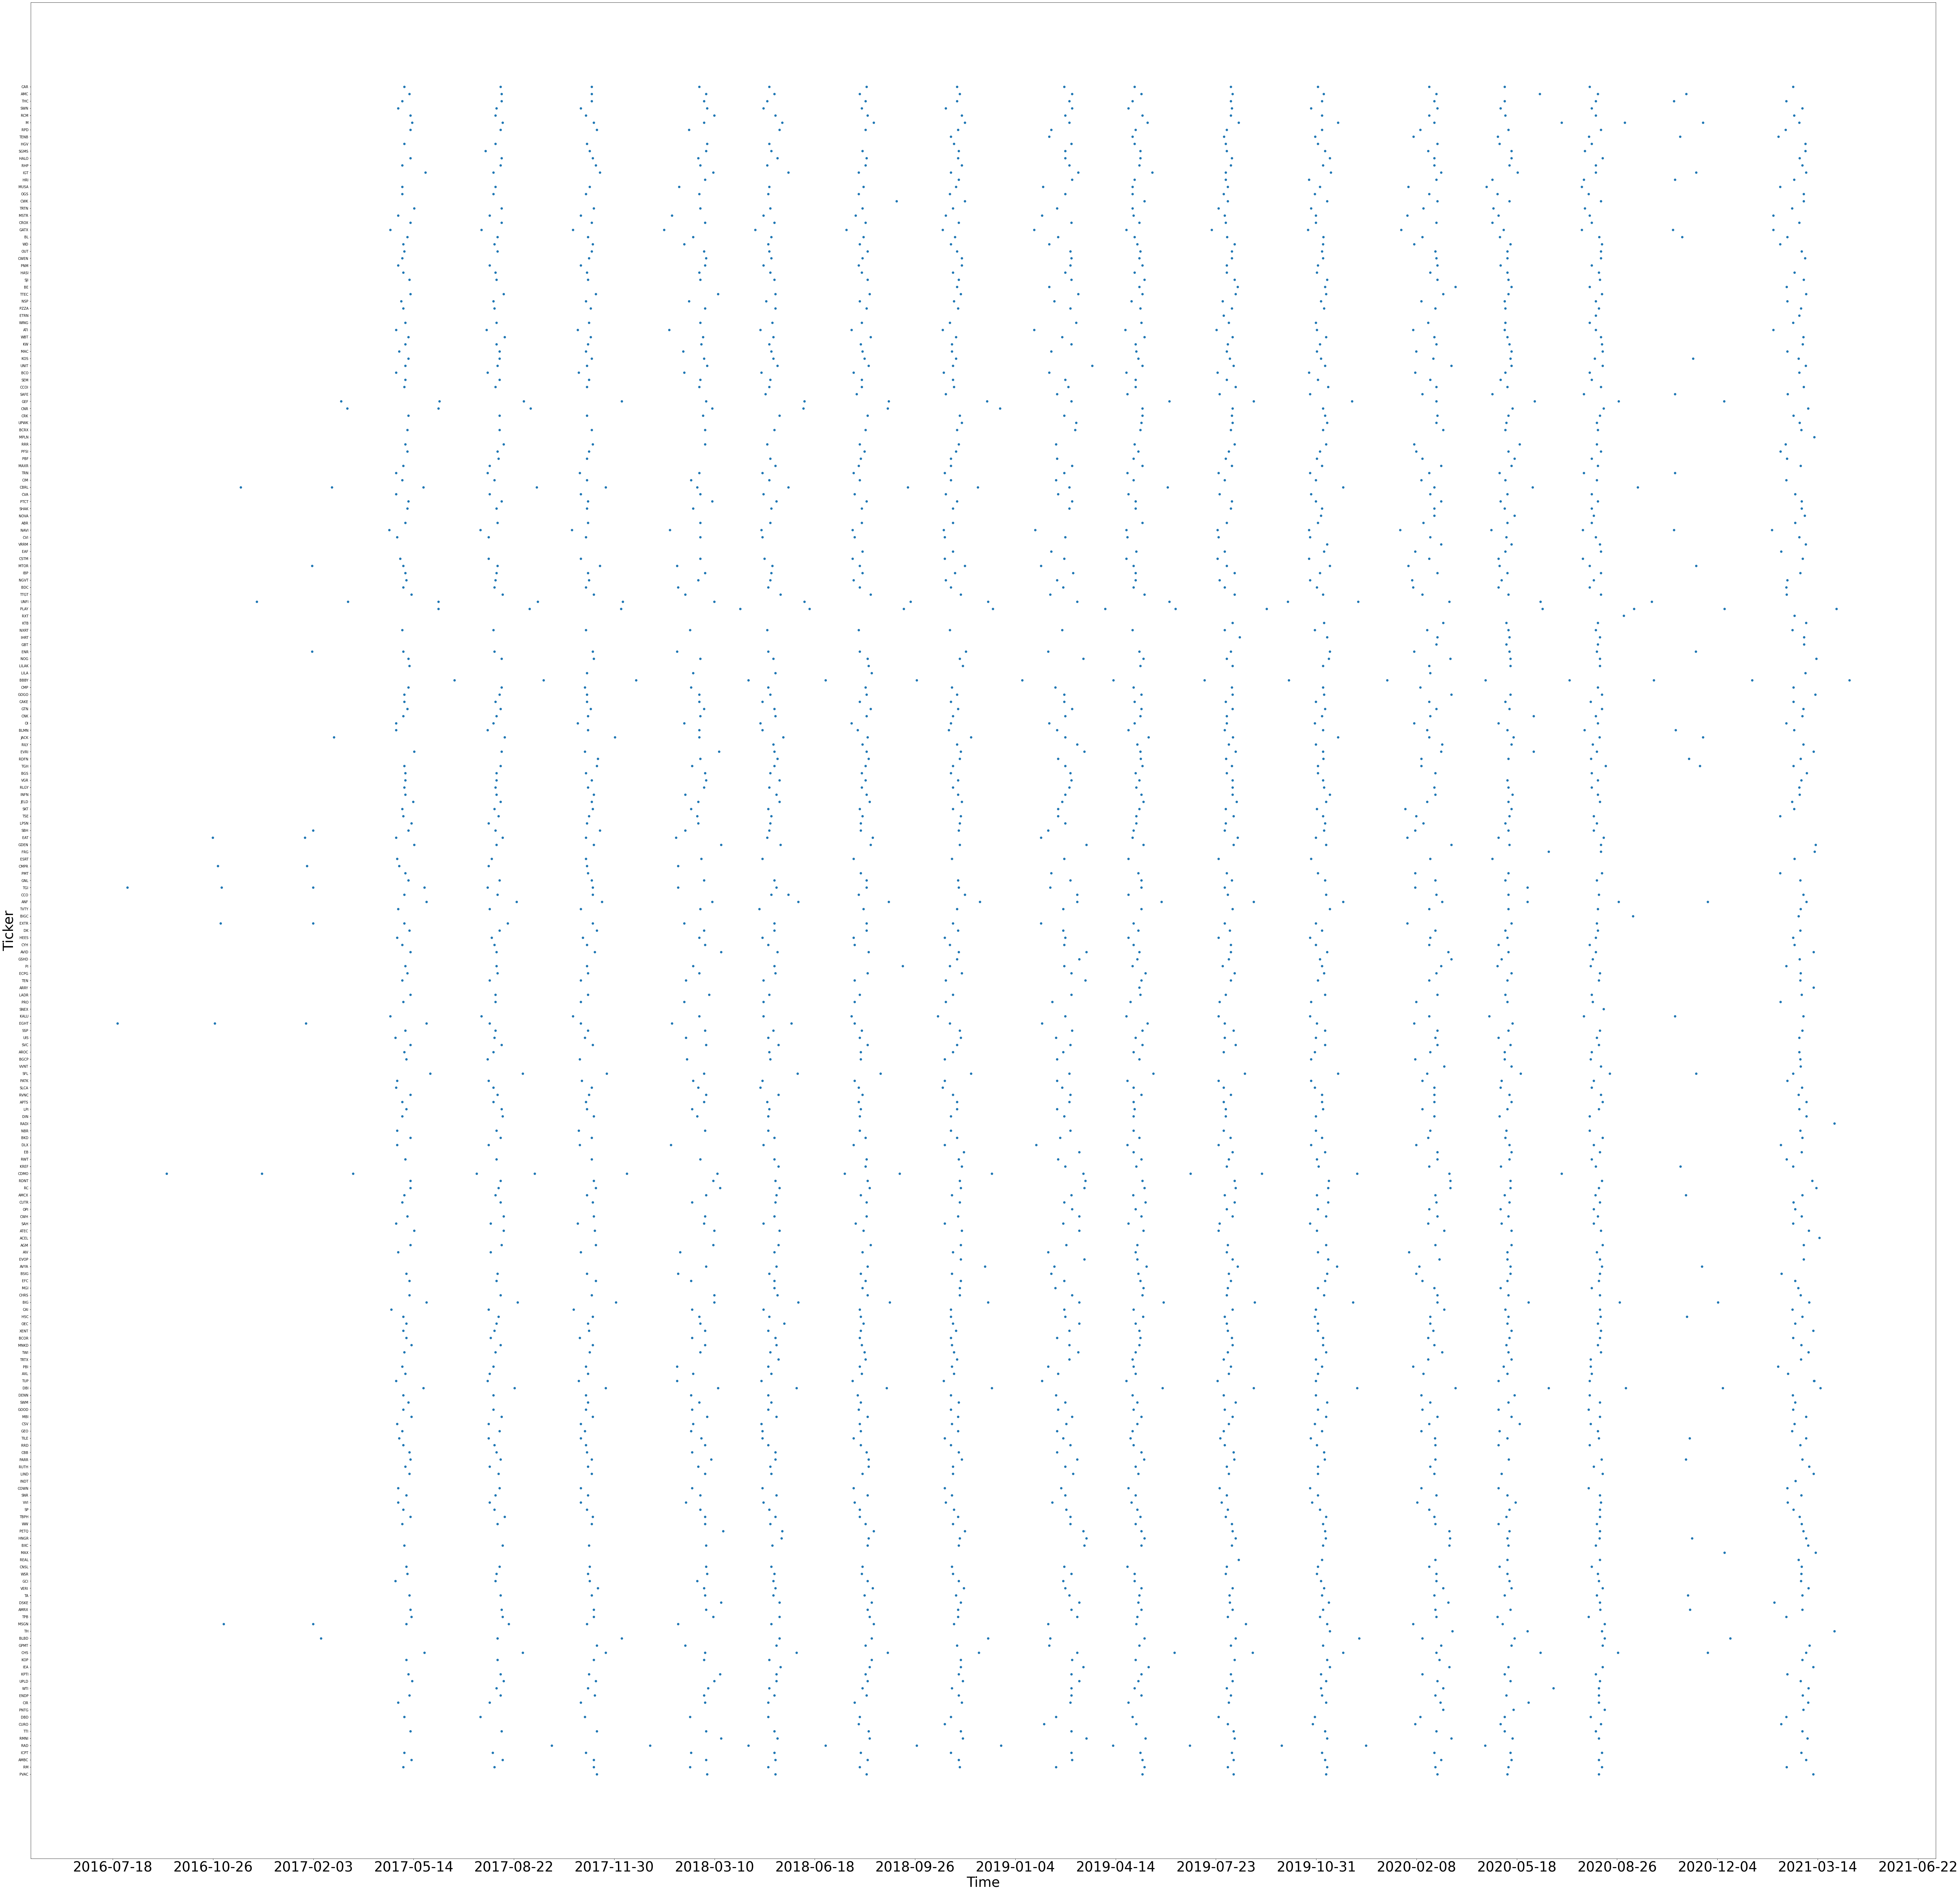

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdate
from matplotlib.pyplot import MultipleLocator
plt.figure(figsize=(100,100))
plt.xticks(fontsize=40)
x_major_locator=MultipleLocator(100)
plt.xlabel('Time',fontsize=40)
plt.ylabel('Ticker',fontsize=40)
plt.scatter(data['Date2'],data['Ticker'])
plt.gca().xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(x_major_locator)
#data['Date2'].plot()
plt.savefig('foo.png')
#plt.savefig('foo.png')

In [95]:
df3['final score']=df3['freq1']+df3['freq2']

In [97]:
df3
sortedar=df3.sort_values(by=['Date2'])

In [106]:
sortedar.to_csv(r'C:\Users\ZHuiL\Documents\FYP QFIN\final_score.csv')


In [99]:
for date in sortedar['Date2']:
    print(date)

2016-07-22 17:00:00
2016-08-01 17:00:00
2016-09-09 17:00:00
2016-10-25 17:00:00
2016-10-27 17:00:00
2016-10-30 17:00:00
2016-11-02 17:00:00
2016-11-03 17:00:00
2016-11-05 17:00:00
2016-11-22 17:00:00
2016-12-08 17:00:00
2016-12-13 17:00:00
2017-01-25 17:00:00
2017-01-26 17:00:00
2017-01-27 17:00:00
2017-02-01 17:00:00
2017-02-01 17:00:00
2017-02-02 17:00:00
2017-02-02 17:00:00
2017-02-02 17:00:00
2017-02-02 17:00:00
2017-02-10 17:00:00
2017-02-21 17:00:00
2017-02-23 17:00:00
2017-03-02 17:00:00
2017-03-08 17:00:00
2017-03-09 17:00:00
2017-03-14 17:00:00
2017-04-19 17:00:00
2017-04-20 17:00:00
2017-04-20 17:00:00
2017-04-21 17:00:00
2017-04-25 17:00:00
2017-04-25 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-26 17:00:00
2017-04-27 17:00:00
2017-04-27 17:00:00
2017-04-27 17:00:00
2017-04-27 17:00:00
2017-04-27 17:00:00
2017-04-27 17:00:00


2020-04-23 17:00:00
2020-04-23 17:00:00
2020-04-23 17:00:00
2020-04-24 17:00:00
2020-04-28 17:00:00
2020-04-28 17:00:00
2020-04-28 17:00:00
2020-04-28 21:46:14
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-29 17:00:00
2020-04-30 17:00:00
2020-04-30 17:00:00
2020-04-30 17:00:00
2020-04-30 17:00:00
2020-04-30 17:00:00
2020-04-30 17:00:00
2020-04-30 22:26:13
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 17:00:00
2020-05-01 23:12:04
2020-05-02 17:00:00
2020-05-02 17:00:00
2020-05-02 17:00:00
2020-05-02 17:00:00
2020-05-02 17:00:00
2020-05-03 17:00:00
2020-05-04 17:00:00
2020-05-04 17:00:00
2020-05-05 17:00:00
2020-05-05 17:00:00
2020-05-05 17:00:00
2020-05-05 17:00:00
2020-05-05 17:00:00
2020-05-05 17:00:00


In [100]:
for date in df3['Date']:
    print(date)

2017-11-12 17:00:00
2018-03-02 17:00:00
2018-05-09 17:00:00
2018-08-08 17:00:00
2019-05-10 17:00:00
2019-08-09 17:00:00
2019-11-09 17:00:00
2020-02-28 17:00:00
2020-05-08 17:00:00
2020-08-07 17:00:00
2021-03-09 14:21:04
2017-05-03 17:00:00
2017-08-02 17:00:00
2017-11-09 17:00:00
2018-02-13 17:00:00
2018-05-02 17:00:00
2018-08-01 17:00:00
2018-11-09 17:00:00
2019-02-13 17:00:00
2019-05-12 17:00:00
2019-08-03 17:00:00
2019-11-10 17:00:00
2020-02-26 17:00:00
2020-05-09 17:00:00
2020-08-10 17:00:00
2021-02-11 02:48:06
2017-05-11 17:00:00
2017-08-10 17:00:00
2017-11-09 17:00:00
2018-03-01 17:00:00
2018-05-09 17:00:00
2018-08-09 17:00:00
2018-11-08 17:00:00
2019-03-01 17:00:00
2019-05-10 17:00:00
2019-08-09 17:00:00
2019-11-08 17:00:00
2020-03-03 17:00:00
2020-05-12 17:00:00
2020-08-07 17:00:00
2021-03-02 13:02:04
2017-05-04 17:00:00
2017-07-31 17:00:00
2017-11-01 17:00:00
2018-02-14 17:00:00
2018-05-08 17:00:00
2018-08-02 17:00:00
2018-10-31 17:00:00
2019-02-28 17:00:00
2019-05-08 17:00:00


2019-11-06 17:00:00
2020-02-27 17:00:00
2020-05-08 17:00:00
2020-08-09 17:00:00
2021-03-01 11:13:04
2017-05-04 17:00:00
2017-08-05 17:00:00
2017-11-07 17:00:00
2018-02-27 17:00:00
2018-05-03 17:00:00
2018-08-09 17:00:00
2018-11-06 17:00:00
2019-02-27 17:00:00
2019-05-08 17:00:00
2019-08-07 17:00:00
2019-11-05 17:00:00
2020-02-26 17:00:00
2020-05-08 17:00:00
2020-08-09 17:00:00
2021-02-25 22:47:15
2017-05-03 17:00:00
2017-08-02 17:00:00
2017-11-08 17:00:00
2018-02-07 17:00:00
2018-05-02 17:00:00
2018-08-01 17:00:00
2018-10-31 17:00:00
2019-02-06 17:00:00
2019-05-05 17:00:00
2019-08-10 17:00:00
2019-11-06 17:00:00
2020-02-05 17:00:00
2020-05-11 17:00:00
2020-08-10 17:00:00
2021-02-04 15:28:06
2017-05-07 17:00:00
2017-08-05 17:00:00
2017-11-03 17:00:00
2018-02-16 17:00:00
2018-05-05 17:00:00
2018-08-05 17:00:00
2018-11-04 17:00:00
2019-02-15 17:00:00
2019-05-02 23:31:15
2019-08-02 22:28:05
2019-11-06 23:23:37
2020-02-13 22:48:08
2020-04-30 22:26:13
2020-08-08 02:37:08
2020-10-30 00:25:03


In [101]:
mean=sortedar['final score'].mean()

In [103]:
top75=np.percentile(sortedar['final score'],25)
top75

0.0007387707017075099

In [104]:
top50=np.percentile(sortedar['final score'],50)
top50

0.0015927189988623437

In [105]:
top25=np.percentile(sortedar['final score'],75)
top25

0.0032265531562337742